# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Load some house sale data
Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('data\home_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
len(sales)

21613

# Exploring the data for housing sales

The house price is correlated with the number of square feet of living space.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


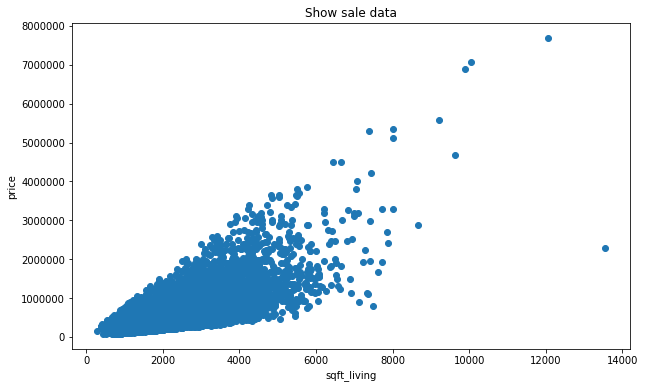

In [5]:
fig ,ax = plt.subplots(figsize=(10,6))

ax.scatter(x=sales['sqft_living'],y=sales['price'])

ax.set(title='Show sale data',
       xlabel='sqft_living',
       ylabel='price')

fig.show()

# Create a simple regression model of sqft_living to price

Split data into training and testing.

    80% train data
    20% test data

In [6]:
train_data,test_data = train_test_split(sales,test_size=0.2)

In [7]:
print("#tran_data = {0}\n#test_data = {1}".format(len(train_data),len(test_data))) 

#tran_data = 17290
#test_data = 4323


## Build regression model

In [8]:
sqft_model = LinearRegression()

In [9]:
x = train_data[['sqft_living']]
y = train_data['price']

sqft_model = sqft_model.fit(x,y)
sqft_model.score(x,y)

predicted_output = sqft_model.predict(train_data[['sqft_living']])
p1 = sqft_model.predict(test_data[['price']])

# Evaluate the simple model

In [10]:
print(test_data['price'].mean())

542994.0582928521


In [11]:
print(sqft_model.score(x,y))

print(r2_score(y,predicted_output))
print(r2_score(test_data['price'],p1))

0.49021019020463286
0.49021019020463286
-228851.37777803178


# Let's show what our prediction look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

    'pip install matplotlib'

In [12]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


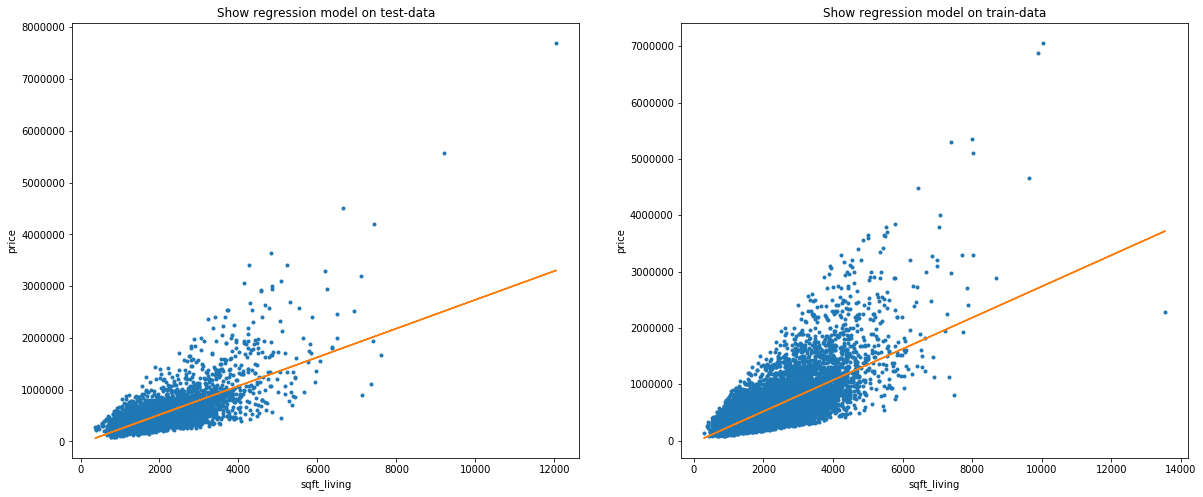

In [13]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,8))

ax1.plot(test_data['sqft_living'], test_data['price'], '.',
         test_data['sqft_living'], sqft_model.predict(test_data[['sqft_living']]),'-')

ax1.set(title='Show regression model on test-data',
       xlabel='sqft_living',
       ylabel='price')

ax2.plot(train_data['sqft_living'], train_data['price'], '.',
         train_data['sqft_living'], sqft_model.predict(train_data[['sqft_living']]),'-')

ax2.set(title='Show regression model on train-data',
       xlabel='sqft_living',
       ylabel='price')

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


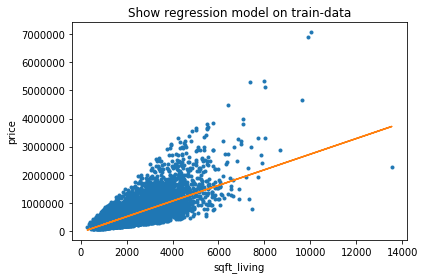

In [14]:
# --Plot model on train data ------------------------------------------------------------
fig, ax= plt.subplots(figsize=(6,4))

ax.plot(train_data['sqft_living'], train_data['price'], '.',
         train_data['sqft_living'], sqft_model.predict(train_data[['sqft_living']]),'-')

ax.set(title='Show regression model on train-data',
       xlabel='sqft_living',
       ylabel='price')

fig.show()
# ------------------------------------------------------------------------------MY CODE--

Above:  blue dots are original data, orange line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [15]:
# The coefficients
w1 = sqft_model.coef_
w0 = sqft_model.intercept_
print('w0 = {0}\nw1 = {1}'.format(w0,w1))

w0 = -37561.396553763654
w1 = [277.40533664]


# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [16]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [17]:
cc1 = sales['bedrooms'].value_counts()
bedroom_frequency = pd.DataFrame({'#bedroom':cc1.index, 'frequency':cc1.values})

cc1 = sales['bathrooms'].value_counts()
bathroom_frequency = pd.DataFrame({'#bathroom':cc1.index, 'frequency':cc1.values})

cc1 = sales['sqft_living'].value_counts()
sqft_living_frequency = pd.DataFrame({'#sqft_living':cc1.index, 'frequency':cc1.values})

cc1 = sales['sqft_lot'].value_counts()
sqft_lot_frequency = pd.DataFrame({'#sqft_lot':cc1.index, 'frequency':cc1.values})

cc1 = sales['floors'].value_counts()
floors_frequency = pd.DataFrame({'#floors':cc1.index, 'frequency':cc1.values})

cc1 = sales['zipcode'].value_counts()
zipcode_frequency = pd.DataFrame({'#zipcode':cc1.index, 'frequency':cc1.values})

In [18]:
print("Bedroom Frequency ---> \n{0}\n\nBathroom Frequency ---> \n{1}\n\nSQFT_living Frequency ---> \n{2}\n\nSQFT_lot Frequency ---> \n{3}\n\nFloors Frequency ---> \n{4}\n\nZipcode Frequency ---> \n{5}".format(bedroom_frequency.head(),bathroom_frequency.head(),sqft_living_frequency.head(),sqft_lot_frequency.head(),floors_frequency.head(),zipcode_frequency.head()))

Bedroom Frequency ---> 
   #bedroom  frequency
0         3       9824
1         4       6882
2         2       2760
3         5       1601
4         6        272

Bathroom Frequency ---> 
   #bathroom  frequency
0       2.50       5380
1       1.00       3852
2       1.75       3048
3       2.25       2047
4       2.00       1930

SQFT_living Frequency ---> 
   #sqft_living  frequency
0          1300        138
1          1400        135
2          1440        133
3          1010        129
4          1660        129

SQFT_lot Frequency ---> 
   #sqft_lot  frequency
0       5000        358
1       6000        290
2       4000        251
3       7200        220
4       4800        120

Floors Frequency ---> 
   #floors  frequency
0      1.0      10680
1      2.0       8241
2      1.5       1910
3      3.0        613
4      2.5        161

Zipcode Frequency ---> 
   #zipcode  frequency
0     98103        602
1     98038        590
2     98115        583
3     98052        574
4     98117

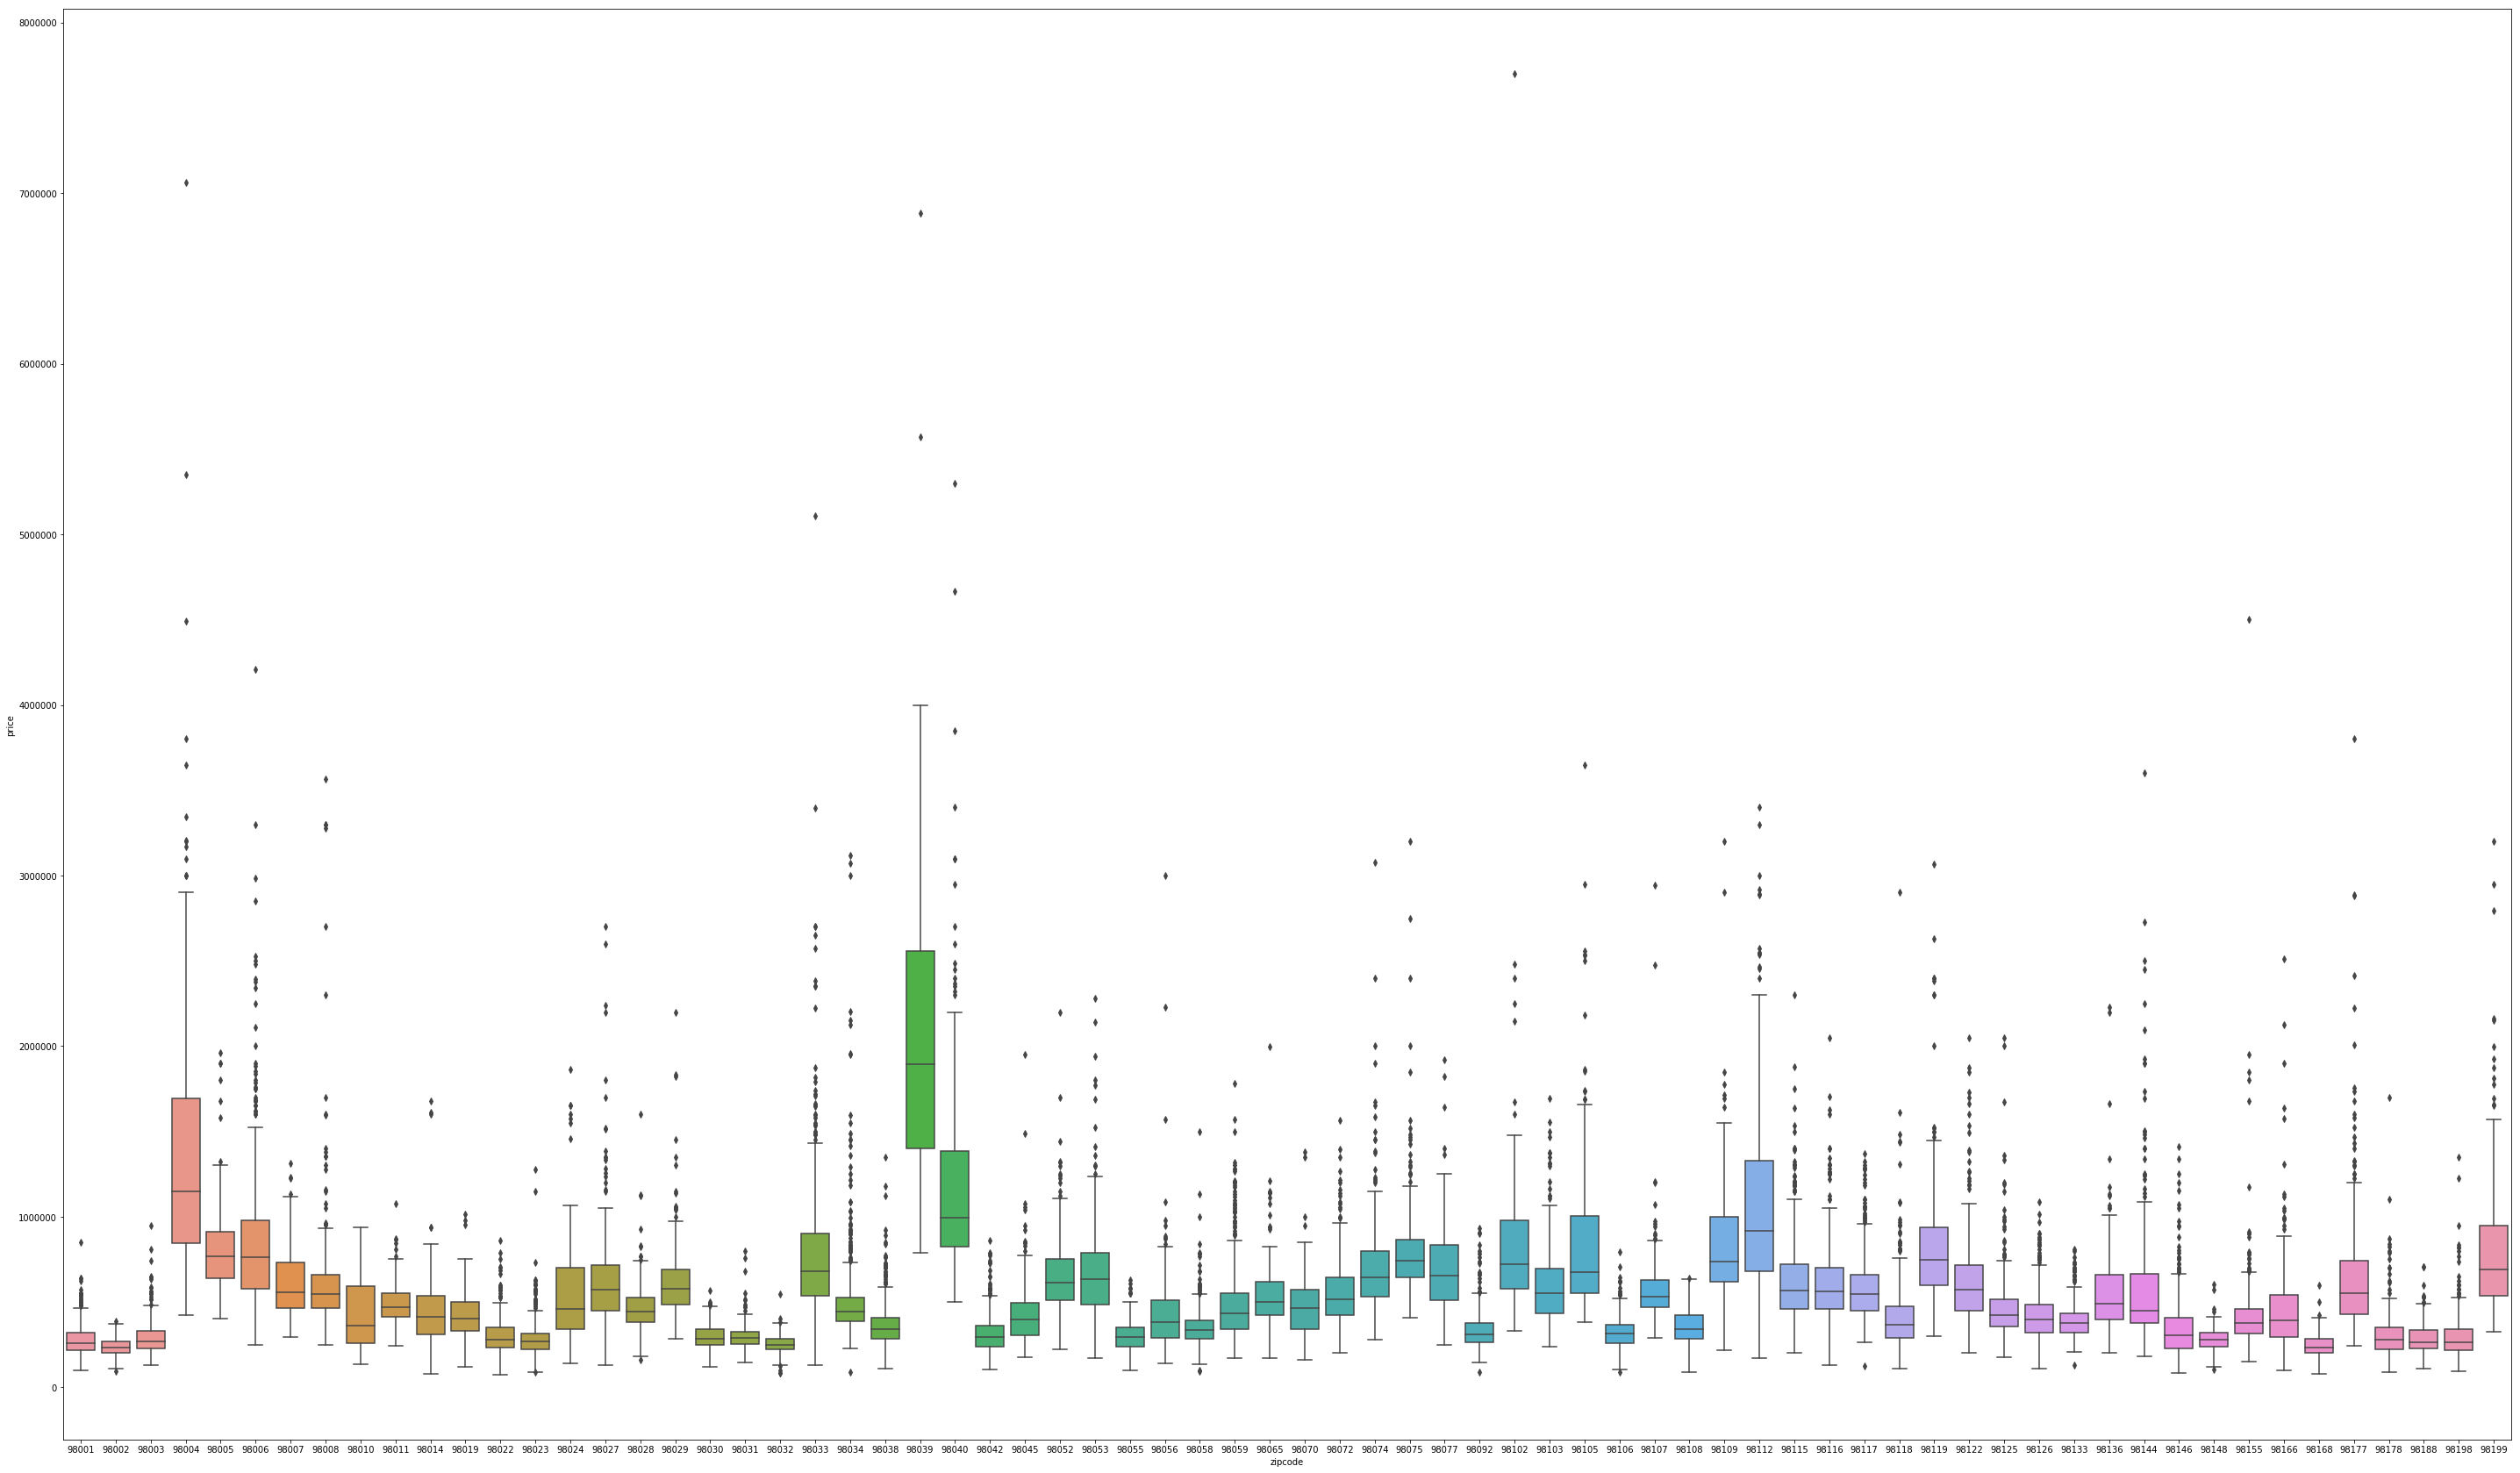

In [19]:
fig, ax = plt.subplots(figsize=(50,30))

data_for_plot = sales#[1:300]

x_plot = 'zipcode'
y_plot = 'price'

ax = sns.boxplot(x=x_plot, y=y_plot, data=data_for_plot)
# ax = sns.swarmplot(x=x_plot, y=y_plot, data=data_for_plot, color='red')

plt.show()

### My Code

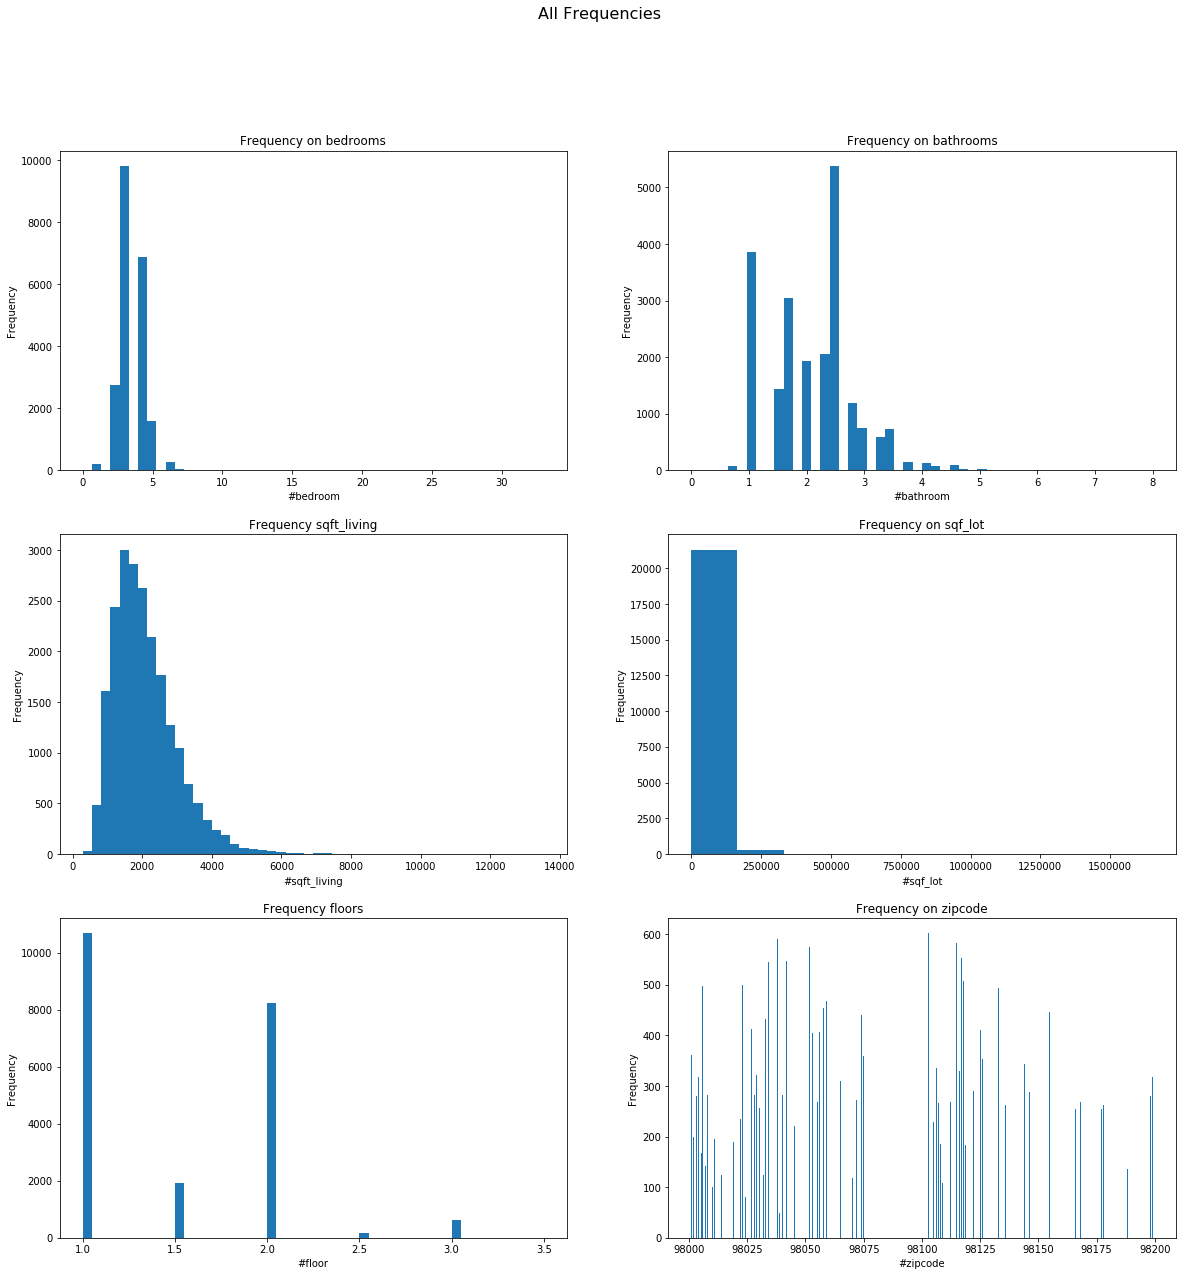

In [20]:
%matplotlib inline
fig,axes= plt.subplots(3,2,figsize=(20,20))

fig.suptitle("All Frequencies",fontsize=16)

axes[0,0].hist(sales['bedrooms'],bins=50)
axes[0,0].set(title="Frequency on bedrooms", xlabel="#bedroom",ylabel="Frequency")

axes[0,1].hist(sales['bathrooms'],bins=50)
axes[0,1].set(title="Frequency on bathrooms", xlabel="#bathroom",ylabel="Frequency")

axes[1,0].hist(sales['sqft_living'],bins=50)
axes[1,0].set(title="Frequency sqft_living", xlabel="#sqft_living",ylabel="Frequency")

axes[1,1].hist(sales['sqft_lot'],bins=10)
axes[1,1].set(title="Frequency on sqf_lot", xlabel="#sqf_lot",ylabel="Frequency")

axes[2,0].hist(sales['floors'],bins=50)
axes[2,0].set(title="Frequency floors", xlabel="#floor",ylabel="Frequency")

axes[2,1].hist(sales['zipcode'],bins=500)
axes[2,1].set(title="Frequency on zipcode", xlabel="#zipcode",ylabel="Frequency")

plt.show()

# Build a regression model with more features

In [21]:
my_features_model = LinearRegression()

In [22]:
my_features_model.fit(train_data[my_features],train_data['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
predicted_output = my_features_model.predict(train_data[my_features])
p1_mul_features = my_features_model.predict(test_data[my_features])

In [24]:
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [25]:
y = train_data['price']
print(my_features_model.score(train_data[my_features],train_data['price']))

print(r2_score(y,predicted_output))
print(r2_score(test_data['price'],p1_mul_features))

0.5119133847002392
0.5119133847002392
0.5259189376115461


In [26]:
def get_residual_sum_of_square(y,y_hat):
    r = y - y_hat
    rs = r*r
    rss = rs.sum()
    return rss    

In [27]:
rss1 = get_residual_sum_of_square(test_data['price'],p1)
rss2 = get_residual_sum_of_square(test_data['price'],p1_mul_features)
print('rss1 = {0}\nrss2 = {1}'.format(rss1,rss2))

rss1 = 1.4610726254592678e+20
rss2 = 302669725012098.44


# Apply learned models to predict prices of 3 houses

In [28]:
house1 = sales[sales['id'] == 5309101200]

In [29]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000.0,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="img\house1.jpg">

In [30]:
print("Price : {0}".format(house1['price']))

Price : 1054    620000.0
Name: price, dtype: float64


In [31]:
print(sqft_model.predict(house1[['sqft_living']]))

[628211.41138318]


In [32]:
print(my_features_model.predict(house1[my_features]))

[632282.81480128]


## Prediction for a second ,fancier house

In [33]:
house2 = sales[sales['id']== 1925069082]

In [34]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="img\house2.jpg">

In [35]:
print("Price : {0}".format(house2['price']))

Price : 1361    2200000.0
Name: price, dtype: float64


In [36]:
print(sqft_model.predict(house2[['sqft_living']]))

[1249599.36545766]


In [37]:
print(my_features_model.predict(house2[my_features]))

[1254366.90688725]


## Last house, super fancy

In [38]:
bill_gates = {'bedrooms':[8],
              'bathrooms':[25],
              'sqft_living':[50000],
              'sqft_lot':[225000],
              'floors':[4],
              'zipcode':[98039],
              'condition':[10],
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="img\house3.jpg">

In [39]:
# Convert to dataframe
bill_gates_df = pd.DataFrame(bill_gates)

print(my_features_model.predict(bill_gates_df[my_features]))

[15384864.54214402]
